Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Question 1 (25%)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

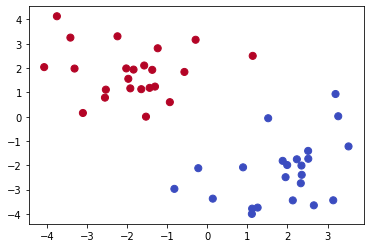

In [3]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

### a. Report the separating hyperplane (line) (5%).

In [4]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100000)  # When the data is separable, we can set C to be very large.
clf.fit(X, Y)

w = clf.coef_[0] # Get the coefficients

a = -w[0] / w[1] # Slope of the line.
b = -(clf.intercept_[0]) / w[1] # Intercept of the line.

print("The separating hyperplane (line) is: y = {:.3} x + {:.3}".format(a,b)) # minus sign,and devide w[1]

# It is also okay if you have a line like this one (or a scaled but equivalent line):
print("Alternative answer: {:.3}x + {:.3}y + {:.3} = 0".format(w[0],w[1],clf.intercept_[0]))

The separating hyperplane (line) is: y = 0.939 x + -0.0258
Alternative answer: -0.642x + 0.683y + 0.0177 = 0


### b. List the support vectors (5%).

In [5]:
clf.support_vectors_

array([[ 1.5180363e+00, -6.3993825e-02],
       [ 1.1323244e+00,  2.5000131e+00],
       [-1.5313310e+00,  1.2000000e-05]])

### c. Calculate and report the upper and lower hyperplanes (lines) of the margin (5%).

In [6]:
# We need the support vectors to get the upper and lower hyperplanes. 
# They will have the same slope as the separating hyperplane but will pass through the support vectors. 
b = clf.support_vectors_[0]
print ("The lower hyperplane is: y = {:.3} x + {:.3}".format(a,(b[1] - a * b[0])))

b = clf.support_vectors_[2]
print ("The upper hyperpane is: y = {:.3} x + {:.3}".format(a,(b[1] - a * b[0])))

The lower hyperplane is: y = 0.939 x + -1.49
The upper hyperpane is: y = 0.939 x + 1.44


### d. Compute and report the width of the margin (5%).

In [7]:
# Distance between the separating hyperplane and upper (or lower) hyperplane:
print(1/(np.sqrt(w[0]**2+w[1]**2)))

# We will also give full credit for:
# Distance between the upper and lower hyperplanes:
print(2/(np.sqrt(w[0]**2+w[1]**2)))

1.0668124474702922
2.1336248949405845


#### Optional exercise: you can add a plot for 5% extra credit. 

#### Give extra 5% if student decided to show a plot (as below) - it will increase the maximum number of points for this homework to 10.5 points total.

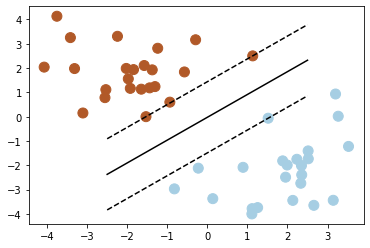

In [8]:
# Not required in your solution: just FYI
# Margin with C = 100000

# Change the form of X to numpy array
X=np.array(X)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.gca()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,s=100)
plt.axis('tight')
plt.show()

### e. What would you expect to happen to the margin if the constant C was made very small? (5%)

The margin would become very wide (and many points would have slack terms).  To confirm this intuition, one could compute the width of the margin with some small C (though this is not required for credit):

In [9]:
clf = svm.SVC(kernel='linear',C=0.00001)
clf.fit(X, Y)

w = clf.coef_[0] # Get the coefficients
print(1/(np.sqrt(w[0]**2+w[1]**2)))

786.4632560712154


## Question 2 (25%)

### Given the dataset provided below, answer the following questions:

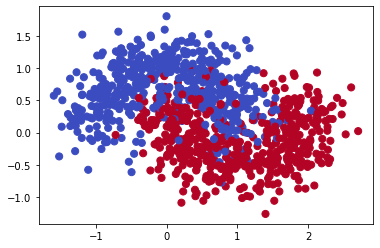

In [10]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy (4%).

In [11]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

# Report IS and OS results.
correct_IS=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print("In sample, we successfully predict {:.4} percent of the data".format((correct_IS)*100))
print("Out of sample, we successfully predict {:.4} percent of the data".format((correct_OS)*100))

In sample, we successfully predict 84.93 percent of the data
Out of sample, we successfully predict 85.15 percent of the data


### Next we will use the validation subset (part of the training set) in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree. (8%)


In [12]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

for degree=1:
When C_opt=0.8429444056658619, we get max accuracy: 0.8288288288288288


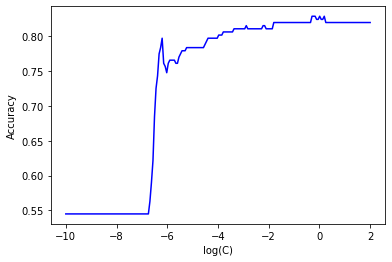

for degree=2:
When C_opt=0.18295913404432887, we get max accuracy: 0.7342342342342343


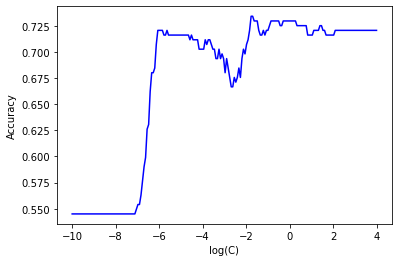

for degree=3:
When C_opt=4.844719976266273, we get max accuracy: 0.8648648648648649


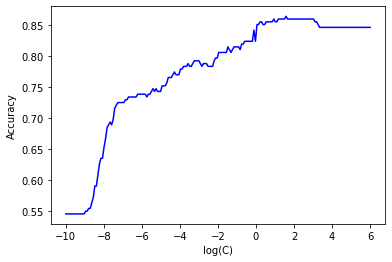

for degree=4:
When C_opt=0.18667391397680153, we get max accuracy: 0.7297297297297297


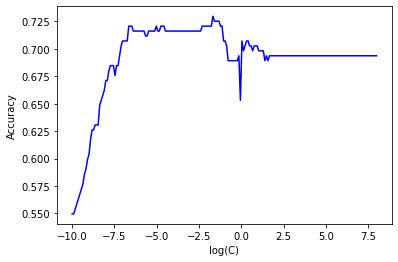

In [13]:
for degree in range(1,5):
    print("for degree={}:".format(degree))
    C=[np.exp(i) for i in np.linspace(-10,2*degree,200)]  # When degree increases, we could use a larger value of C.
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct)
    temp=pd.DataFrame([C,OS_validation]).T
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])//2
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]
    print("When C_opt={}, we get max accuracy: {}".format(C_opt,temp.iloc[:,1].max()))
    
    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

### c. Explain how each of these selected parameters can impact the performance of the model. Provide insights into the consequences of choosing different values for these parameters, particularly in terms of overfitting, accuracy, generalization, and other (5%).

Answers may vary, but the logic should be the following:
1. Degree of the Polynomial: Higher degrees allow for more complex decision boundaries, potentially capturing intricate patterns in the training data. However, higher degrees also increase the risk of overfitting, especially if the model captures noise in the data.
2. Regularization Constant (C): C is the inverse of the regularization strength. Smaller values of C provide stronger regularization, helping to prevent overfitting. Larger values of C reduce the regularization strength, allowing the model to fit the training data more closely. The choice of C impacts the trade-off between fitting the training data well and generalizing to new, unseen data.

Also, interpretability is important: lower-degree polynomials and higher regularization may lead to simpler models, aiding interpretability.

### d. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected (8%).

In [15]:
clf = svm.SVC(kernel='poly',C=4.844719976266273,degree=3)
clf.fit(X_train, Y_train)

#Report OS result:
correct_OS=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("On the held-out test data, we successfully predict {:.4} percent of the data.".format((correct_OS)*100))

On the held-out test data, we successfully predict 87.58 percent of the data.


## Question 3 (10%).

### This task is to be done with manual calculations rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes

### Questions:

#### a. Calculate the following sample probabilities:

P(Yes) = 6/11

P(No) = 5/11

P(Red|Yes) = 5/6

P(SUV|Yes) = 2/6 = 1/3

P(Domestic|Yes) = 3/6 = 1/2

P(Red|No) = 2/5

P(SUV|No) = 3/5

P(Domestic|No) = 3/5

#### b. Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

Unnormalized posterior for stolen = P(Yes)*P(Red|Yes)*P(SUV|Yes)*P(Domestic|Yes) = (6/11)(5/6)(1/3)(1/2) = 5/66 = 125/1650

Unnormalized posterior for not stolen = P(No)*P(Red|No)*P(SUV|No)*P(Domestic|No) = (5/11)(2/5)(3/5)(3/5) = 18/275 = 108/1650

Posterior probability for stolen = 125/233 ~ 0.536

## Question 4 (15%)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [14]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre  glu  blood_p  triceps  serum   b_m  pedigree_f  age
0      3  158       64       13    387  31.2       0.295   24
1      0   84       64       22     66  35.8       0.545   21
2      9  120       72       22     56  20.8       0.733   48
3      4  110       76       20    100  28.4       0.118   27
4      2  100       66       20     90  32.9       0.867   28


### a. What is the prediction accuracy for Naive Bayes, both in-sample (on the training data) and out-of-sample (on the test data)? (3%)

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("In sample prediction accuracy:",(y_pred_train==y_train).sum()*1.0/len(y_train))
print("Out of sample prediction accuracy:",(y_pred_test==y_test).sum()*1.0/len(y_test))

In sample prediction accuracy: 0.7415254237288136
Out of sample prediction accuracy: 0.7025316455696202


### b. What is the prior probability of diabetes, learned from the training data? (3%)

In [16]:
print(model.class_prior_[1])

0.326271186440678


### c. What is the mean and variance of each input variable for patients with diabetes? (3%)

In [17]:
print("Means:", model.theta_[1])
print("Variances:",model.sigma_[1])
#print("Variances:",model.var_[1]) #for newer versions of scikit-learn

Means: [  4.         142.06493506  74.38961039  33.16883117 200.22077922
  34.89090909   0.61419481  35.44155844]
Variances: [1.25974146e+01 9.64736055e+02 1.78913151e+02 1.07750729e+02
 1.58105097e+04 3.95320073e+01 1.85246043e-01 1.09493350e+02]


### d. What is the mean and variance of each input variable for patients without diabetes? (3%)

In [18]:
print("Means:", model.theta_[0])
print("Variances:",model.sigma_[1])
#print("Variances:",model.var_[0]) #for newer versions of scikit-learn

Means: [  2.67295597 111.23899371  69.08805031  27.11320755 128.25786164
  31.73773585   0.47428931  28.28301887]
Variances: [1.25974146e+01 9.64736055e+02 1.78913151e+02 1.07750729e+02
 1.58105097e+04 3.95320073e+01 1.85246043e-01 1.09493350e+02]


### e. What are some potential steps you may want to use to improve the prediction accuracy using the same model? (3%)

The answers may vary, make sure that they are no general (not something like "you have to do better data processing or test different methods"). Good answer might be about tuning of VarSmoothing Parameter.

## Question 5 (25%)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [19]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  6  2
2  2  6  2
3  6  2  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  6
8  5  1  1
0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    1
Name: y, dtype: int64


### a. Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy (10%).

In [20]:
def trainNaiveBayesDiscrete(trainData):
  #training discrete Naive Bayes Classifier
  tY=trainData.loc[:,trainData.columns[0]]
  m=max([trainData[j][i] for j in trainData.columns[1:] for i in trainData.index]) #maximal number of classes in each feature of a training set
  #create output data structure for the probabilities
  dp=[pd.DataFrame(columns=trainData.columns, index=range(1,m+1)), pd.DataFrame(columns=trainData.columns, index=range(1,m+1))]
  #split the training data between two labels
  ind1=tY==0
  ind2=tY==1
  #estimate P(y=b)  
  dp[0][trainData.columns[0]][1]=1.0*ind1.sum()/len(trainData.index)
  dp[1][trainData.columns[0]][1]=1.0*ind2.sum()/len(trainData.index)
  #estimate conditional probabilities P(x|y=b)
  for j in trainData.columns[1:]:
    for i in range(1,m+1):
        dp[0].loc[i,j]=1.0*(trainData[j][ind1]==i).sum()/ind1.sum();
        dp[1].loc[i,j]=1.0*(trainData[j][ind2]==i).sum()/ind2.sum();
  return dp


def classifyNaiveBayesDiscrete(classData,dp):
  #classifying using trained discrete Naive Bayes Classifier
  Y=classData[classData.columns[0]]*0
  for i in classData.index:
    P1=dp[0][classData.columns[0]][1];
    P2=dp[1][classData.columns[0]][1];
    for j in classData.columns[1:]:
      P1=P1*dp[0][j][classData[j][i]]
      P2=P2*dp[1][j][classData[j][i]]
    Y[i]=int(P2>P1) 
  return Y

In [21]:
trainData=pd.concat([y_Labeled_train,X_Labeled_train],axis=1)
testdata=pd.concat([y_Labeled_test,X_Labeled_test],axis=1)

dp=trainNaiveBayesDiscrete(trainData)

#Calculate the predicted labels:
C=classifyNaiveBayesDiscrete(testdata,dp)

# Report the accuracy of prediction
acc=format(100.0*sum(C==y_Labeled_test)/len(y_Labeled_test))
print ("We correctly classified {0} percent of the data based on the labeled data only".format(acc))   

We correctly classified 58.333333333333336 percent of the data based on the labeled data only


### b. Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer) (15%). 

In [22]:
import math
def EM(X_Label,y_Label,X_Unlabel,dp):
  t = 0  
  haslabels=len(y_Label)>0

  while True:
    t = t + 1

    classData=X_Unlabel
    # Now we want to calculate P(y=1|x) and P(y=2|x) for all observations xj. (these are bunch of scalars)
    # we need this to calculate new dp. Basically speaking, for every new iteration we need a new dp.

    #for y=1 and y=2

    p_x_1=[] #unnormalized P(y=1|x)
    p_x_2=[] #unnormalized P(y=2|x)
    cols=dp[0].columns

    for i in classData.index:
        P1=dp[0][cols[0]][1];
        P2=dp[1][cols[0]][1];
        for j in classData.columns:
            P1=P1*dp[0][j][classData[j][i]]
            P2=P2*dp[1][j][classData[j][i]]
        p_x_1.append(P1)
        p_x_2.append(P2)
    
 
    #Rescale p_x_1 and p_x_2:
    summ=np.asarray(p_x_1)+np.asarray(p_x_2)
    p_x_1_s=np.asarray(p_x_1)/(summ)
    p_x_2_s=np.asarray(p_x_2)/(summ)
    inds_1 = np.where(np.isnan(p_x_1_s))
    inds_2 = np.where(np.isnan(p_x_2_s))
    p_x_1_s[inds_1]=0.5
    p_x_2_s[inds_2]=0.5
    #Now let's calculate P(y=1) and P(y=2)
    p_1=p_x_1_s.sum()/len(p_x_1_s)
    p_2=p_x_2_s.sum()/len(p_x_2_s)


    #Now let's calculate the probability distribution of P(xi|y=1) and P(xi|y=2)
    
    m=max([classData[j][i] for j in classData.columns for i in classData.index]) #maximal number of classes in each feature of a training set

    #create output data structure for the probabilities - new iteration
    
    dp1=[pd.DataFrame(columns=cols, index=range(1,m+1)), pd.DataFrame(columns=cols, index=range(1,m+1))]

    #P(y=b)  
    dp1[0][cols[0]][1]=p_1
    dp1[1][cols[0]][1]=p_2


    #estimate conditional probabilities P(x|y=b) -do we add labeled data to fit?

    temp=np.concatenate((np.asmatrix(X_Unlabel),np.asarray(pd.DataFrame(p_x_1_s)),np.asarray(pd.DataFrame(p_x_2_s))),
                        axis=1)
    temp=pd.DataFrame(temp)
    if haslabels:
        temp_l=np.concatenate((np.asmatrix(X_Label),np.asmatrix(1*(y_Label==0)).transpose(),np.asmatrix(1*(y_Label==1)).transpose()),axis=1)
        
        temp_l= pd.DataFrame(temp_l)
        pd.concat([temp,temp_l])
   

    for j in range(1,len(dp[0].T)):
        for i in range(len(dp[0])):

            dp1[0].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-2].sum()/temp.iloc[:,-2].sum()
            dp1[1].iloc[i,j]=temp[temp.iloc[:,j-1]==i+1].iloc[:,-1].sum()/temp.iloc[:,-1].sum()
 
        ############################################################################################
    # Now we use dp to decide whether to continue our iterations
    if (((dp1[0]-dp[0])**2).sum()).sum()+(((dp1[1]-dp[1])**2).sum()).sum()<0.001: #if dp does not change much
        break
    else: 
        dp=dp1  #save new dp and perform next iteration

        
    ###############################################################################################
        #Calculate the log-likelihood
        
        L=0
        
        for i in classData.index:
            P1=dp[0][cols[0]][1];
            P2=dp[1][cols[0]][1];
            for j in classData.columns:
                P1=P1*dp[0][j][classData[j][i]]
                P2=P2*dp[1][j][classData[j][i]]
            temp=math.log(P1+P2)
            L=L+temp
        if haslabels:    
            for i in X_Label.index:
                yi=list(y_Label)[i]
                P=dp[yi][cols[0]][1];
            for j in X_Label.columns:
                P=P*dp[yi][j][X_Label[j][i]]
            L=L+math.log(P)
        
        print("Iteration {0}: log likelihood = {1}".format(t,L))    
    
  return dp



In [23]:
#perform EM estimation for theta. dp is taken from part a.
dpEM=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,dp)
#OS test
C=classifyNaiveBayesDiscrete(testdata,dpEM) #classify test data with a new theta given by EM
acc=100.0*sum(C==y_Labeled_test)/len(y_Labeled_test)
print ("After EM we correctly classified {0} percent of the data".format(acc))

Iteration 1: log likelihood = -555.776745952814
Iteration 2: log likelihood = -546.9873417965149
Iteration 3: log likelihood = -531.654944615962
Iteration 4: log likelihood = -520.0288720337857
Iteration 5: log likelihood = -516.4391738836155
Iteration 6: log likelihood = -515.0021091260513
After EM we correctly classified 83.33333333333333 percent of the data


<ipython-input-22-d246bf2c69cc>:31: RuntimeWarning: invalid value encountered in true_divide
  p_x_1_s=np.asarray(p_x_1)/(summ)
<ipython-input-22-d246bf2c69cc>:32: RuntimeWarning: invalid value encountered in true_divide
  p_x_2_s=np.asarray(p_x_2)/(summ)
